In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Read and Organize Data

In [2]:
base = "Data/Data Analyst Trial - Data Set - "
df_agents = pd.read_csv(base + "agents.csv")
df_calls = pd.read_csv(base + "calls.csv")
df_customers = pd.read_csv(base + "customers.csv")
df_markets = pd.read_csv(base + "markets.csv")
df_sales = pd.read_csv(base + "sales.csv")

### Agents

In [3]:
print(df_agents.shape)
df_agents.rename(columns={"first_name":"agent_first_name",
                          "last_name":"agent_last_name"}, inplace=True)
df_agents.head()

(1000, 10)


,agent_id,agent_first_name,agent_last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024
0,hiroshi_thompson_560,Hiroshi,Thompson,cleveland_oh,69,131,18,18,5.0,4.11
1,ali_nelson_663,Ali,Nelson,phoenix_az,24,226,4,32,1.0,2.94
2,kwame_singh_576,Kwame,Singh,salt_lake_city_ut,141,73,16,25,6.0,2.58
3,hao_jackson_527,Hao,Jackson,st_louis_mo,7,272,1,40,6.0,2.00
4,camila_mohamed_261,Camila,Mohamed,kansas_city_mo,132,35,14,10,1.0,2.74


### Calls

In [4]:
print(df_calls.shape)

# Clean call_date
df_calls["call_date"] = pd.to_datetime(
    df_calls["call_date"],
    format="%m/%d/%y %H:%M",
    errors="coerce"
)

df_calls["disposition"] = df_calls["disposition"].replace(
    {"Talked to Customer": "Connected"}
)

df_calls.head()

(175359, 5)


,call_id,customer_id,call_date,disposition,call_handler
0,1,1,2025-01-01 00:56:00,Voicemail,NaN
1,2,1,2025-01-04 00:21:00,Voicemail,NaN
2,3,2,2025-01-01 02:31:00,Voicemail,NaN
3,4,2,2025-01-03 15:50:00,Voicemail,NaN
4,5,2,2025-01-04 12:45:00,Connected,Vivian


### Customers

In [5]:
print(df_customers.shape)
df_customers.head()

(50000, 10)


,customer_id,created_at,first_name,last_name,address,city,state,zip_code,market_id,assigned_agent
0,1,2025-01-01 0:56:00,James,Butt,957 Sunset Ave,Fresno,CA,90272,fresno_ca,yuki_ali_72
1,2,2025-01-01 2:31:00,Josephine,Darakjy,1864 Pine Ct,Phoenix,AZ,85575,phoenix_az,sofia_smith_808
2,3,2025-01-01 3:19:00,Art,Venere,5542 Ridge St,Tampa,FL,32138,tampa_fl,mina_carter_615
3,4,2025-01-01 4:44:00,Lenna,Paprocki,5624 Wilson Dr,Louisville,KY,40251,louisville_ky,amanda_khan_445
4,5,2025-01-01 5:36:00,Donette,Foller,2783 Oak Ct,Cincinnati,OH,43899,cincinnati_oh,zainab_garcia_38


### Markets

In [6]:
print(df_markets.shape)

# Clean price_new_list_median
df_markets["price_new_list_median"] = (
    df_markets["price_new_list_median"]
        .replace(r"[\$,]", "", regex=True)
        .astype(float)
)

# Clean price_closed_median
df_markets["price_closed_median"] = (
    df_markets["price_closed_median"]
        .replace(r"[\$,]", "", regex=True)
        .astype(float)
)

df_markets.head()

(50, 11)


,market_id,census_name,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count
0,new_york_ny,"New York-Newark-Jersey City, NY-NJ Metro Area","New York, NY",19756722,58,849000.0,785000.0,36156,362,7062,13542
1,los_angeles_ca,"Los Angeles-Long Beach-Anaheim, CA Metro Area","Los Angeles, CA",13012469,55,979000.0,915000.0,18409,330,5260,6606
2,chicago_il,"Chicago-Naperville-Elgin, IL-IN Metro Area","Chicago, IL",9359555,52,369900.0,360000.0,16751,160,6308,8251
3,dallas_tx,"Dallas-Fort Worth-Arlington, TX Metro Area","Dallas, TX",7807555,64,425611.0,408386.0,29448,448,13318,6148
4,houston_tx,"Houston-Pasadena-The Woodlands, TX Metro Area","Houston, TX",7274714,60,349000.0,329900.0,33947,1304,10622,5334


### Sales

In [7]:
print(df_sales.shape)

# Clean amount
df_sales["amount"] = (
    df_sales["amount"]
        .replace(r"[\$,]", "", regex=True)
        .astype(float)
)

# Clean sale_date
df_sales["sale_date"] = pd.to_datetime(
    df_sales["sale_date"],
    format="%m/%d/%Y %H:%M:%S",
    errors="coerce"
)

df_sales.head()

(14172, 4)


,sale_id,customer_id,sale_date,amount
0,1,2,2025-01-04 12:45:00,232562.0
1,2,3,2025-01-05 14:00:00,473272.0
2,3,7,2025-01-13 13:01:00,280980.0
3,4,15,2025-01-12 14:52:00,500904.0
4,5,17,2025-01-08 08:16:00,247848.0


### Aggregate at the Customer Level

In [8]:
# Aggregate Calls by Customer
calls_agg = (
    df_calls
    .groupby("customer_id")
    .agg(
        total_calls=("call_id", "count"),
        first_call_date=("call_date", "min"),
        last_call_date=("call_date", "max"),
        unique_callers=("call_handler", "nunique"),
    )
    .reset_index()
)

# Count dispositions per customer
dispositions = (
    df_calls
    .pivot_table(
        index="customer_id",
        columns="disposition",
        values="call_id",
        aggfunc="count",
        fill_value=0
    )
    .add_prefix("calls_")
    .reset_index()
)
dispositions.columns = dispositions.columns.str.lower()

calls_agg = calls_agg.merge(dispositions, on="customer_id", how="left")
calls_agg["customer_life_span_in_days"] = (calls_agg["last_call_date"] - calls_agg["first_call_date"]).dt.days
calls_agg.head()

,customer_id,total_calls,first_call_date,last_call_date,unique_callers,calls_connected,calls_disconnected,calls_voicemail,customer_life_span_in_days
0,1,2,2025-01-01 00:56:00,2025-01-04 00:21:00,0,0,0,2,2
1,2,3,2025-01-01 02:31:00,2025-01-04 12:45:00,1,1,0,2,3
2,3,4,2025-01-01 03:19:00,2025-01-05 14:00:00,2,2,0,2,4
3,4,4,2025-01-01 04:44:00,2025-01-13 02:36:00,1,1,0,3,11
4,5,3,2025-01-01 05:36:00,2025-01-06 01:01:00,1,1,1,1,4


In [9]:
# Join on Customers
df_customer_master = df_customers.copy()
df_customer_master = (
    df_customer_master
    .merge(calls_agg, on="customer_id", how="left")
    .merge(df_sales.drop(columns=["sale_id"]), on="customer_id", how="left")
)

# Fill nulls with 0
df_customer_master[["total_calls", "unique_callers"]] = \
    df_customer_master[["total_calls", "unique_callers"]].fillna(0)

# Measure time-to-purchase post first contact
df_customer_master["days_between_first_call_and_sale"] = (
    df_customer_master["sale_date"] - df_customer_master["first_call_date"]
).dt.days

# Confirm no sales before calls
df_customer_master["sale_before_call"] = (
    df_customer_master["sale_date"] < df_customer_master["first_call_date"]
)
try:
    assert df_customer_master["sale_before_call"].mean() == 0
except:
    print("WARNING: Sales before contact in at least one case")

# Confirm no sales before calls
df_customer_master["has_sale"] = (
    ~df_customer_master["sale_date"].isna()
)

# Merge agents 
df_customer_master = df_customer_master.merge(
    df_agents.drop(columns=["market_id"]),
    left_on="assigned_agent",
    right_on="agent_id",
    how="left"
)

# Merge markets
df_customer_master = df_customer_master.merge(
    df_markets,
    on="market_id",
    how="left"
)

# Ensure date format
date_cols = [
    "created_at",
    "first_call_date",
    "last_call_date",
    "sale_date",
]

for col in date_cols:
    if col in df_customer_master.columns:
        df_customer_master[col] = pd.to_datetime(df_customer_master[col], errors="coerce")

df_customer_master.head()

,customer_id,created_at,first_name,last_name,address,city,state,zip_code,market_id,assigned_agent,...,census_name,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count
0,1,2025-01-01 00:56:00,James,Butt,957 Sunset Ave,Fresno,CA,90272,fresno_ca,yuki_ali_72,...,"Fresno, CA Metro Area","Fresno, CA",1170942,45,440850.0,437000.0,2077,56,670,669
1,2,2025-01-01 02:31:00,Josephine,Darakjy,1864 Pine Ct,Phoenix,AZ,85575,phoenix_az,sofia_smith_808,...,"Phoenix-Mesa-Chandler, AZ Metro Area","Phoenix, AZ",4941206,71,490000.0,465000.0,18828,492,9428,5217
2,3,2025-01-01 03:19:00,Art,Venere,5542 Ridge St,Tampa,FL,32138,tampa_fl,mina_carter_615,...,"Tampa-St. Petersburg-Clearwater, FL Metro Area","Tampa, FL",3240469,58,394278.0,369291.0,18623,228,7824,4206
3,4,2025-01-01 04:44:00,Lenna,Paprocki,5624 Wilson Dr,Louisville,KY,40251,louisville_ky,amanda_khan_445,...,"Louisville/Jefferson County, KY-IN Metro Area","Louisville, KY",1361847,44,299000.0,280000.0,3688,30,1792,1479
4,5,2025-01-01 05:36:00,Donette,Foller,2783 Oak Ct,Cincinnati,OH,43899,cincinnati_oh,zainab_garcia_38,...,"Cincinnati, OH-KY-IN Metro Area","Cincinnati, OH",2255257,42,316433.0,304890.0,4347,34,2246,2552


### Aggregate at the Agent Level

In [10]:
df_agent_master = (
    df_customer_master
    .groupby("agent_id")
    .agg(
        customers=("customer_id", "nunique"),
        conversion_rate=("has_sale", "mean"),
        med_revenue=("amount", "median"),
        total_revenue=("amount", "sum"),
        median_days_to_sale=("days_between_first_call_and_sale", "median")
    )
).reset_index()

df_agent_master.head()

,agent_id,customers,conversion_rate,med_revenue,total_revenue,median_days_to_sale
0,ahmad_campbell_232,60,0.400000,537740.5,12550246.0,7.0
1,ahmad_garcia_535,54,0.296296,534701.5,8380978.0,6.5
2,ahmad_green_733,38,0.315789,506635.5,5806146.0,9.0
3,ahmad_hassan_336,36,0.361111,409046.0,5549726.0,6.0
4,ahmad_jefferson_780,38,0.421053,518295.0,8128686.0,6.0


## Analysis by Deliverable

### Best Markets
A marketing team manager wants to know:
- What are currently the five best markets for Smiley Real Estate?
- What evidence do you have for that?
- Also, did you notice anything of interest that we could share with an outside audience (a pure market data trend)?

In [11]:
market_performance = (
    df_customer_master
    .groupby("market_id", as_index=False)
    .agg(
        customers_in_market=("customer_id", "nunique"),
        customers_with_sale=("has_sale", "sum"),
        total_revenue=("amount", "sum"),
        avg_calls_per_customer=("total_calls", "mean"),
        median_calls_per_customer=("total_calls", "median"),
        median_days_call_to_sale=("days_between_first_call_and_sale", "median")
    )
)

# Core performance ratios
market_performance["conversion_rate"] = (
    market_performance["customers_with_sale"] / market_performance["customers_in_market"]
)

market_performance["revenue_per_customer"] = (
    market_performance["total_revenue"] / market_performance["customers_in_market"]
)

# Calls per sale (effort needed per successful customer)
market_performance["calls_per_sale"] = np.where(
    market_performance["customers_with_sale"] > 0,
    market_performance["avg_calls_per_customer"] * market_performance["customers_in_market"] / market_performance["customers_with_sale"],
    np.nan
)

market_cols = [
    "market_id",
    "census_name",
    "common_name",
    "population",
    "days_on_market_median",
    "price_new_list_median",
    "price_closed_median",
    "listings_on_market_count",
    "listings_price_increase_count",
    "listings_price_decrease_count",
    "listings_closed_count",
]

markets_sub = df_markets[market_cols]
markets_summary = market_performance.merge(markets_sub, on="market_id", how="left")

# Price momentum: more increases vs decreases
markets_summary["price_momentum"] = (
    markets_summary["listings_price_increase_count"]
    - markets_summary["listings_price_decrease_count"]
)

# Market speed: lower DOM = faster market = higher speed
markets_summary["market_speed"] = 1 / markets_summary["days_on_market_median"]

# Standardize fields worth including in Score
metric_cols = [
    "listings_closed_count",
    "conversion_rate",
    "revenue_per_customer",
    "avg_calls_per_customer",
    "market_speed",
    "price_closed_median",
    "price_momentum",
]

for col in metric_cols:
    mean = markets_summary[col].mean()
    std = markets_summary[col].std(ddof=0)
    markets_summary[f"z_{col}"] = (markets_summary[col] - mean) / std

z_cols = [f"z_{c}" for c in metric_cols]

# Simple composite score: higher = better overall
markets_summary["market_score"] = markets_summary[z_cols].mean(axis=1)

markets_summary.head()

,market_id,customers_in_market,customers_with_sale,total_revenue,avg_calls_per_customer,median_calls_per_customer,median_days_call_to_sale,conversion_rate,revenue_per_customer,calls_per_sale,...,price_momentum,market_speed,z_listings_closed_count,z_conversion_rate,z_revenue_per_customer,z_avg_calls_per_customer,z_market_speed,z_price_closed_median,z_price_momentum,market_score
0,atlanta_ga,965,303,147470997.0,3.488083,4.0,5.0,0.313990,152819.686010,11.108911,...,-10316,0.016667,1.422520,2.042344,1.609983,-0.573070,-0.683769,-0.317999,-2.359707,0.162900
1,austin_tx,980,267,130003442.0,3.485714,3.0,6.0,0.272449,132656.573469,12.794007,...,-4442,0.011364,-0.655334,-0.740133,-0.634839,-0.644437,-1.048144,-0.188143,-0.227481,-0.591216
2,baltimore_md,1019,276,135460558.0,3.549558,4.0,5.0,0.270854,132934.796860,13.105072,...,-2610,0.027027,-0.125477,-0.846982,-0.603863,1.279200,0.028098,-0.323440,0.437524,-0.022134
3,birmingham_al,1024,283,136636589.0,3.500977,4.0,5.0,0.276367,133434.168945,12.667845,...,-1510,0.016949,-0.794480,-0.477683,-0.548267,-0.184581,-0.664360,-0.644415,0.836817,-0.353853
4,boston_ma,1040,266,125534537.0,3.470192,3.0,6.0,0.255769,120706.285577,13.567669,...,-3104,0.041667,0.441712,-1.857376,-1.965301,-1.112117,1.033998,0.915384,0.258205,-0.326499


In [12]:
top5_markets = (
    markets_summary
    .sort_values("market_score", ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top5_markets_display = top5_markets[[
    "market_id",
    "common_name",
    "customers_in_market",
    "customers_with_sale",
    "conversion_rate",
    "revenue_per_customer",
    "market_speed",
    "price_closed_median",
    "price_momentum",
    "market_score",
]]

top5_markets_display

,market_id,common_name,customers_in_market,customers_with_sale,conversion_rate,revenue_per_customer,market_speed,price_closed_median,price_momentum,market_score
0,san_jose_ca,"San Jose, CA",958,270,0.281837,135174.017745,0.058824,1632174.0,-496,1.018398
1,seattle_wa,"Seattle, WA",1050,323,0.307619,150769.410476,0.047619,832871.0,-3878,0.965201
2,san_francisco_ca,"San Francisco, CA",1045,284,0.271770,133534.284211,0.047619,1482500.0,-1774,0.787577
3,grand_rapids_mi,"Grand Rapids, MI",1026,314,0.306043,152216.563353,0.071429,355500.0,-992,0.724689
4,washington_dc,"Washington, DC",959,305,0.318040,154236.049009,0.022222,580748.0,-4932,0.720619


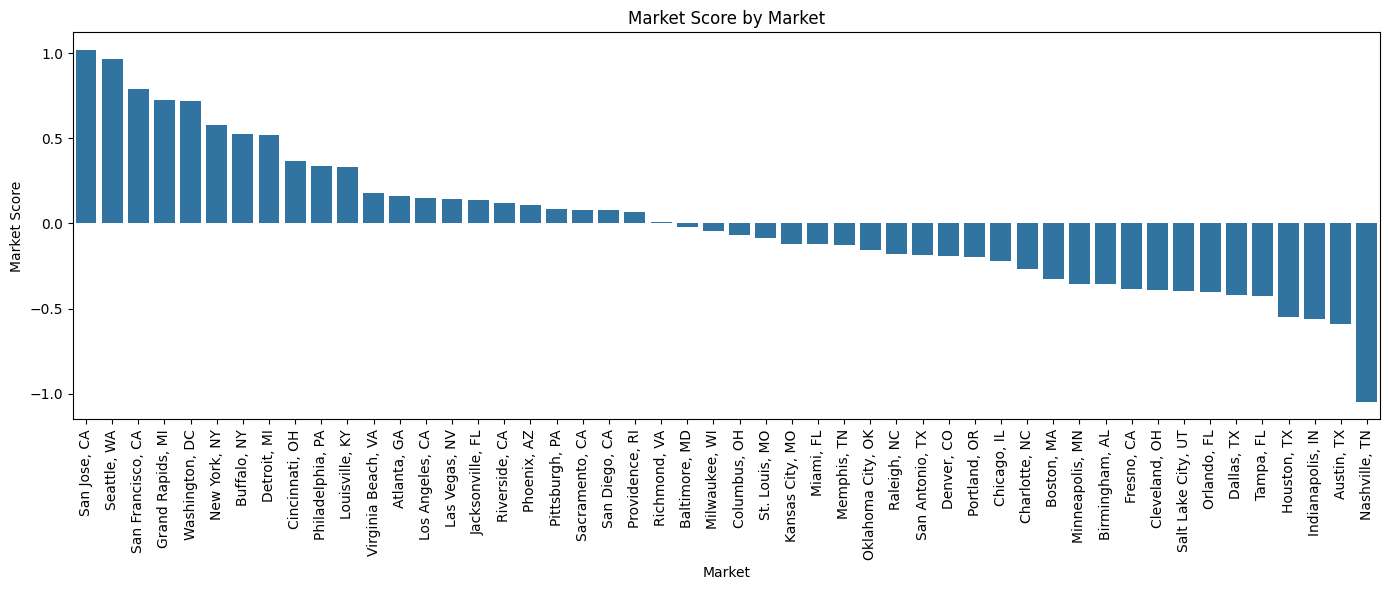

In [13]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=markets_summary.sort_values(by="market_score", ascending=False),
    x="common_name",      # or "market_id"
    y="market_score"
)

plt.xticks(rotation=90)
plt.xlabel("Market")
plt.ylabel("Market Score")
plt.title("Market Score by Market")
plt.tight_layout()
plt.show()


### Best Agents
A sales team manager wants to know: 
- Who is the best agent we have in each market?
- Why do you think these people are the best - not specifically for each agent, but in general, why are these the top agents?

In [14]:
# 0. Decide how many customers agent must have to be considered and what our score weights should be
#     - Implies a level of ramp - normally would like to consider tenure but information unavailable
min_customers_in_market = 20
weights = {
    "conversion": .7,
    "book_size": .1,
    "med_revenue": .1,
    "time_to_sale": .1
}

# 1. Agent performance within each market (from customers)
agent_market_perf = (
    df_customer_master.groupby(
        ["market_id", "common_name", "agent_id", "agent_first_name", "agent_last_name"],
        as_index=False
    )
    .agg(
        customers_handled=("customer_id", "nunique"),
        customers_with_sale=("has_sale", "sum"),
        total_revenue_market=("amount", "sum"),
    )
)

# 2. Merge in overall agent stats
agent_market_perf = agent_market_perf.merge(
    df_agent_master,
    how="left",
    on="agent_id"
)

# 3. Filter out agents with too few customers in that market
agent_market_perf_filtered = agent_market_perf[
    agent_market_perf["customers_handled"] >= min_customers_in_market
].copy()

# 4. Select metrics for scoring
score_cols = [
    "conversion_rate",
    "customers_handled",
    "med_revenue",
    "median_days_to_sale"
]

agent_scores = agent_market_perf_filtered.copy()

# Flip signs where LOWER values = better
agent_scores["median_days_to_sale"] = agent_scores["median_days_to_sale"] * -1

# Standardize each metric for scoring
scaler = StandardScaler()
agent_scores_z = scaler.fit_transform(agent_scores[score_cols])

# Add back to dataframe
for idx, col in enumerate(score_cols):
    agent_scores[f"z_{col}"] = agent_scores_z[:, idx]

# Calculate Agent Score
agent_scores["agent_score"] = (
      weights["conversion"] * agent_scores["z_conversion_rate"]
    + weights["book_size"] * agent_scores["z_customers_handled"]
    + weights["med_revenue"] * agent_scores["z_med_revenue"]
    + weights["time_to_sale"] * agent_scores["z_median_days_to_sale"]
)

# Pull one agent per market
best_agents_scored = (
    agent_scores
    .sort_values(["market_id", "agent_score"], ascending=[True, False])
    .groupby("market_id")
    .head(1)
    .reset_index(drop=True)
)

# Flip back 
best_agents_scored["median_days_to_sale"] = best_agents_scored["median_days_to_sale"] * -1

best_agents_scored.head()

,market_id,common_name,agent_id,agent_first_name,agent_last_name,customers_handled,customers_with_sale,total_revenue_market,customers,conversion_rate,med_revenue,total_revenue,median_days_to_sale,z_conversion_rate,z_customers_handled,z_med_revenue,z_median_days_to_sale,agent_score
0,atlanta_ga,"Atlanta, GA",arjun_robinson_452,Arjun,Robinson,44,24,11110984.0,44,0.545455,462604.5,11110984.0,4.5,4.078403,-0.511872,-0.564281,0.678373,2.815104
1,austin_tx,"Austin, TX",jose_hernandez_319,Jose,Hernandez,60,22,11843909.0,60,0.366667,530448.0,11843909.0,5.5,1.292697,0.846096,1.073797,-0.049548,1.091923
2,baltimore_md,"Baltimore, MD",kenji_hernandez_461,Kenji,Hernandez,48,19,9034126.0,48,0.395833,461890.0,9034126.0,5.0,1.747145,-0.172380,-0.581533,0.314412,1.179052
3,birmingham_al,"Birmingham, AL",hassan_washington_575,Hassan,Washington,57,21,10490995.0,57,0.368421,506605.0,10490995.0,5.0,1.320033,0.591477,0.498109,0.314412,1.064423
4,boston_ma,"Boston, MA",robert_jones_846,Robert,Jones,45,18,8425685.0,45,0.400000,453066.5,8425685.0,7.0,1.812066,-0.426999,-0.794576,-1.141430,1.032146


In [15]:
best_agents_scored_consolidated = \
    best_agents_scored[["common_name", "agent_id", "conversion_rate", "customers_handled", 
                        "med_revenue", "median_days_to_sale", "agent_score"]]
best_agents_scored_consolidated.head()

,common_name,agent_id,conversion_rate,customers_handled,med_revenue,median_days_to_sale,agent_score
0,"Atlanta, GA",arjun_robinson_452,0.545455,44,462604.5,4.5,2.815104
1,"Austin, TX",jose_hernandez_319,0.366667,60,530448.0,5.5,1.091923
2,"Baltimore, MD",kenji_hernandez_461,0.395833,48,461890.0,5.0,1.179052
3,"Birmingham, AL",hassan_washington_575,0.368421,57,506605.0,5.0,1.064423
4,"Boston, MA",robert_jones_846,0.400000,45,453066.5,7.0,1.032146
